In [1]:
import folium
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def GPS_to_XY(lx, ly, M):
    rho = 6400000
    lxm, lym = M
    return rho*np.cos(ly)*abs(abs(lx)-abs(lxm)), rho*abs(abs(ly)-abs(lym))

def translate(M):
    M = M.split('.')
    l1 = int(M[0][::-1][2:][::-1])
    l2 = float(M[0][::-1][:2][::-1]+'.'+M[1])/60
    return(l1 + l2)

In [3]:
N = 48.199312*np.pi/180
E = -3.015426*np.pi/180
rho = 6400000
M = E, N

f = open('gnss-fix.csv', 'r')
L = []

f.readline()
for line in f:
    l = (line.rstrip('\n')).split(',')
    L.append((float(l[7]), float(l[8])))

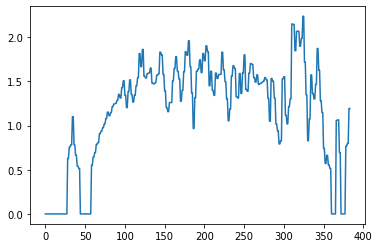

In [4]:
f = open('gnss-vel.csv', 'r')
S = []

f.readline()
for line in f:
    l = (line.rstrip('\n')).split(',')
    S.append((float(l[5]), float(l[6])))

S = np.array(S)

#plt.plot(S[:, 0])
#plt.plot(S[:, 1])
N = []
for k in S:
    N.append(np.linalg.norm(k))
plt.plot(N)
plt.show()

In [5]:
center = [48.199405, -3.015438]
guerledan = folium.Map(center, zoom_start=20)
folium.Marker(L[0], popup='Départ').add_to(guerledan)
folium.Marker(L[-1], popup='Arrivée').add_to(guerledan)
folium.PolyLine(L, color="crimson", weight=2.5, opacity=0.8).add_to(guerledan)
guerledan
#guerledan.save("guerledan.html")